### 逻辑斯蒂回归损失函数可视化

#### 导包

In [35]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale # 数据标准化Z-score

#### 加载数据

In [36]:
# 1、加载乳腺癌数据
data = datasets.load_breast_cancer()
# 逻辑斯蒂回归，梯度下降，无量纲化处理：标准化
X, y = scale(data['data'][:, :2]), data['target']

#### 建模

In [37]:
# 2、求出两个维度对应的数据在逻辑回归算法下的最优解
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression()

#### 方程系数

In [38]:
lr.coef_

array([[-3.33731028, -0.8771414 ]])

In [39]:
# 3、分别把两个维度所对应的参数W1和W2取出来
w1 = lr.coef_[0, 0]
w2 = lr.coef_[0, 1]
print(w1, w2)

-3.3373102846154525 -0.8771414036339871


#### sigmoid函数定义

In [40]:
# 4、已知w1和w2的情况下，传进来数据的X，返回数据的y_predict
# 预测的概率
def sigmoid(X, w1, w2):
    z = w1*X[0] + w2*X[1]
    return 1 / (1 + np.exp(-z))

#### 损失函数

In [41]:
# 5、传入一份已知数据的X，y，如果已知w1和w2的情况下，计算对应这份数据的Loss损失
def loss_function(X, y, w1, w2):
    loss = 0
    # 遍历数据集中的每一条样本，并且计算每条样本的损失，加到loss身上得到整体的数据集损失
    for x_i, y_i in zip(X, y):
        # 这是计算一条样本的y_predict，即概率
        p = sigmoid(x_i, w1, w2)
        loss += -1*y_i*np.log(p)-(1-y_i)*np.log(1-p)
    return loss

#### 最优解w1和w2，设置一个范围

In [42]:
# 6、参数w1和w2取值空间
w1_space = np.linspace(w1-2, w1+2, 100)
w2_space = np.linspace(w2-2, w2+2, 100)

loss1_ = np.array([loss_function(X, y, i, w2) for i in w1_space])
loss2_ = np.array([loss_function(X, y, w1, i) for i in w2_space])

(100,)

(100,)

(100, 100)

(100, 100)

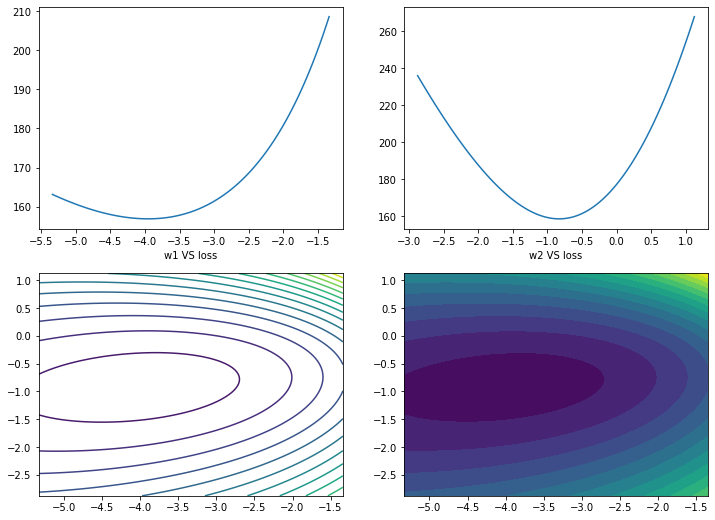

In [43]:
# 7、数据可视化
fig1 = plt.figure(figsize=(12, 9))
plt.subplot(2, 2, 1)
plt.plot(w1_space, loss1_)
plt.xlabel('w1 VS loss')

plt.subplot(2, 2, 2)
plt.plot(w2_space, loss2_)
plt.xlabel('w2 VS loss')

plt.subplot(2, 2, 3)
w1_grid, w2_grid = np.meshgrid(w1_space, w2_space) # 网格交叉
display(w1_space.shape,w2_space.shape,w1_grid.shape,w2_grid.shape)
loss_grid = loss_function(X, y, w1_grid, w2_grid)

plt.contour(w1_grid, w2_grid, loss_grid,20) # 等高线

plt.subplot(2, 2, 4)
plt.contourf(w1_grid, w2_grid, loss_grid,20) # 等高面
plt.savefig('./4-损失函数可视化.png',dpi = 200)

In [44]:
A = np.array([1,2,3])
B = np.array([4,6])

np.meshgrid(A,B)

[array([[1, 2, 3],
        [1, 2, 3]]),
 array([[4, 4, 4],
        [6, 6, 6]])]

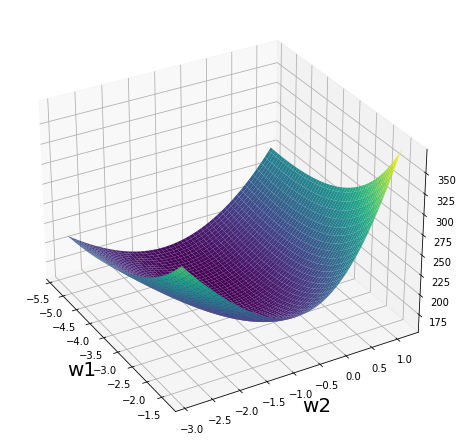

In [45]:
# 8、3D立体可视化
import warnings
warnings.filterwarnings('ignore')
fig2 = plt.figure(figsize=(12,6))
ax = Axes3D(fig2)

ax.plot_surface(w1_grid, w2_grid, loss_grid,cmap = 'viridis')

plt.xlabel('w1',fontsize = 20)
plt.ylabel('w2',fontsize = 20)
ax.view_init(30,-30) # 调整视图角度
plt.savefig('./5-损失函数可视化.png',dpi = 200)

### PCA降维

In [46]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# decomposition 降解，降维，分解【由多变少】
from sklearn.decomposition import PCA

#### 加载数据

In [47]:
X,y = datasets.load_iris(return_X_y=3)
display(X.shape,y.shape)

(150, 4)

(150,)

#### PCA降维

In [48]:
pca = PCA(n_components=2, # 选择两个特征
          whiten=True) # 归一化
pca.fit(X) # 训练，计算过程
X_pca = pca.transform(X) # 转变
display(X[:5],X_pca[:5],X_pca.mean(axis = 0),X_pca.std(axis = 0))

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

array([[-1.30533786,  0.64836932],
       [-1.31993521, -0.35930856],
       [-1.40496732, -0.29424412],
       [-1.33510889, -0.64613986],
       [-1.32702321,  0.6633044 ]])

array([-1.37075536e-15, -1.74379030e-15])

array([0.99666109, 0.99666109])

In [49]:
pca = PCA(n_components=0.97, # 选择特征权重大于95%
          whiten=True) # 归一化

pca.fit(X) # 训练，计算过程

X_pca = pca.transform(X) # 转变
display(X[:5],X_pca[:5],X_pca.mean(axis = 0),X_pca.std(axis = 0))

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

array([[-1.30533786,  0.64836932],
       [-1.31993521, -0.35930856],
       [-1.40496732, -0.29424412],
       [-1.33510889, -0.64613986],
       [-1.32702321,  0.6633044 ]])

array([-1.37075536e-15, -1.74379030e-15])

array([0.99666109, 0.99666109])

#### 模型训练【非降维数据】

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

1.0

#### 模型训练【降维数据】

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size = 0.2,random_state = 1024)
display(X_train.shape)
model = LogisticRegression()

model.fit(X_train,y_train)

model.score(X_test,y_test)

(120, 2)

0.9666666666666667